In [1]:
from vega_datasets import data
import altair as alt
import pandas as pd
import matplotlib.pyplot as plt


employment_data = data.us_employment()

employment_data.total = employment_data.sum(numeric_only=True)

employment_data.month = pd.to_datetime(employment_data.month)

employment_data["year"] = pd.DatetimeIndex(employment_data.month).year

employment_long = pd.melt(
    employment_data, id_vars=["month", "year"], value_name="totalfigure"
).reset_index()

employment_long.rename(columns={"variable": "employment_type"}, inplace=True)

employment_long.head(10)



C:\Users\Chris Henry\AppData\Local\Temp\ipykernel_19340\3806745542.py:9: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  employment_data.total = employment_data.sum(numeric_only=True)


,index,month,year,employment_type,totalfigure
0,0,2006-01-01,2006,nonfarm,135450.0
1,1,2006-02-01,2006,nonfarm,135762.0
2,2,2006-03-01,2006,nonfarm,136059.0
3,3,2006-04-01,2006,nonfarm,136227.0
4,4,2006-05-01,2006,nonfarm,136258.0
5,5,2006-06-01,2006,nonfarm,136337.0
6,6,2006-07-01,2006,nonfarm,136543.0
7,7,2006-08-01,2006,nonfarm,136722.0
8,8,2006-09-01,2006,nonfarm,136870.0
9,9,2006-10-01,2006,nonfarm,136882.0


In [2]:
grouped_df = employment_long.groupby(by=[employment_long.year, employment_long.employment_type])

grouped_df = grouped_df.aggregate({'totalfigure': 'sum'}).reset_index()

grouped_df.head(10)

,year,employment_type,totalfigure
0,2006,construction,92275.0
1,2006,durable_goods,107781.0
2,2006,education_and_health_services,217822.0
3,2006,financial_activities,100397.0
4,2006,goods_producing,270368.0
5,2006,government,263700.0
6,2006,information,36455.0
7,2006,leisure_and_hospitality,157308.0
8,2006,manufacturing,169878.0
9,2006,mining_and_logging,8215.0


In [3]:
alt.Chart(grouped_df).mark_bar(size=50).encode(
    x=alt.X("year:T",scale=alt.Scale(zero=False)),
    y=alt.Y(
        "totalfigure:Q",
        scale=alt.Scale(zero=True)
    ),
    color="employment_type:N",    
    tooltip=["employment_type", "totalfigure", "month:T"]).properties(width=1200, height=600).properties(width=1800, height=800)

alt.Chart(...)

In [34]:

sorted = employment_long.sort_values(by=['year']).groupby(by=['employment_type', 'year'])

yearly_data = sorted.sum('totalfigure').reset_index()

yearly_data.set_index(['year', 'employment_type'])

yearly_data['variance'] = yearly_data['totalfigure'].diff()

yearly_data.head()

,employment_type,year,index,totalfigure,variance
0,construction,2006,8706,92275.0,NaN
1,construction,2007,8850,91528.0,-747.0
2,construction,2008,8994,85948.0,-5580.0
3,construction,2009,9138,72208.0,-13740.0
4,construction,2010,9282,66220.0,-5988.0


In [87]:
brush = alt.selection_interval()


alt.Chart(yearly_data).mark_bar().encode(
    x=alt.X('year:O', sort='y'),
    y=alt.Y('variance:Q'),
    color=alt.Color('employment_type:N'),
    tooltip=["employment_type", "totalfigure", "variance"],
    order=alt.Order(
        'variance:Q', sort='descending'
    )
    
).properties(width=1800, height=1200).transform_filter(alt.datum.year > 2006).interactive()

bar = alt.Chart(title='total employment variance by employment type and year').mark_bar().encode(
    x=alt.X('year:O', sort='y'),
    y=alt.Y('variance:Q'),
    color=alt.Color('employment_type:N'),
    tooltip=["employment_type", "totalfigure", "variance"],
    order=alt.Order(
        'variance:Q', sort='descending'
    )
    
).properties(width=1800, height=1200).transform_filter(alt.datum.year > 2006).add_params(brush)

line = alt.Chart().mark_line(color='blue', point=True).encode(
    y='mean(variance):Q',
    x='year:O',
    tooltip=['mean(variance):Q']
    
).transform_filter(alt.datum.year > 2006)

text = alt.Chart(yearly_data).mark_text().encode(
    x=alt.X('max(variance):Q'),
    text=alt.Text('variance:Q', format='.1f')
    
)


detail_bars = alt.Chart().mark_bar().encode(
    x='variance:Q',
    y='employment_type:N',
    text='variance'
    
).transform_filter(brush).properties(width=1800)


alt.vconcat(bar + line, detail_bars, data=yearly_data)

alt.VConcatChart(...)

In [70]:
brush = alt.selection_interval()


alt.Chart(employment_long).mark_area().encode(
    x="month:T",
    y="totalfigure:Q",
    color="employment_type:N",
    tooltip=["employment_type", "totalfigure", "month:T"],
).properties(width=1800, height=1200).interactive()


area = alt.Chart().mark_area().encode(
    x="month:T",
    y="totalfigure:Q",
    color="employment_type:N",
    tooltip=["employment_type", "totalfigure", "month:T"],
).properties(width=1800, height=1200).add_params(brush)


bars = alt.Chart().mark_bar().encode(
    x='totalfigure:Q',
    y='employment_type:N'
    
).transform_filter(brush).properties(width=1800)

alt.vconcat(area, bars, data=employment_long)

alt.VConcatChart(...)

In [7]:
alt.Chart(employment_long).mark_area().encode(
    x="month:T",
    y=alt.Y(
        "totalfigure:Q",
    ).stack("normalize"),
    color="employment_type:N",
    tooltip=["employment_type", "totalfigure", "month:T"],
).properties(width=1800, height=1200)

alt.Chart(...)

In [8]:

alt.Chart(employment_long).mark_bar().encode(
    x="year:N",
    y="totalfigure:Q",
    color="employment_type:N",
    tooltip=["employment_type", "totalfigure", "month:T"],
).properties(width=1800, height=1200)

alt.Chart(...)

In [9]:
alt.Chart(employment_long).mark_bar().encode(
    x="year:N",
    y=alt.Y(
        "totalfigure:Q",
    ).stack("normalize"),
    color="employment_type:N",
    tooltip=["employment_type", "totalfigure", "month:T"],
).properties(width=1800, height=1200)

alt.Chart(...)

In [10]:
alt.Chart(employment_long).mark_boxplot().encode(
    x="year:N",
    y="totalfigure:Q",
    color="employment_type:N",
    tooltip=["employment_type", "totalfigure", "month:T"],
).properties(width=900, height=600)

alt.Chart(...)

In [11]:
alt.Chart(employment_long).mark_point().encode(
    x="mean(totalfigure):Q",
    y="totalfigure:Q",
    color="employment_type:N",
    tooltip=["employment_type", "totalfigure", "month:T"],
).properties(width=1800, height=1200)

alt.Chart(...)

In [12]:
import numpy as np

employment_mean = employment_long.totalfigure.mean()
employment_sd = employment_long.totalfigure.std()

normal = np.random.normal(employment_mean, employment_sd, 20000)

abs(employment_mean - np.mean(normal))

print(employment_sd)

40764.6018742868


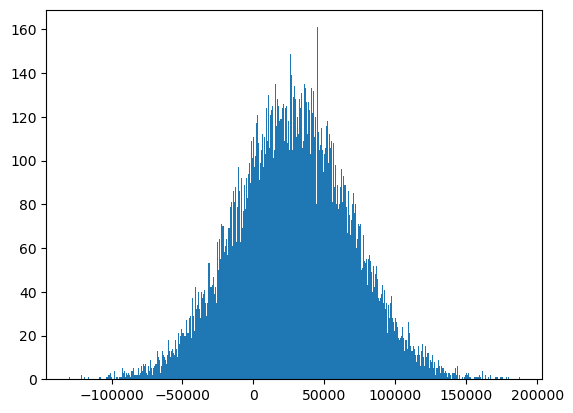

In [13]:


bins = 500

plt.hist(normal, bins)


plt.plot(
    bins,
    1
    / (employment_sd * np.sqrt(2 * np.pi))
    * np.exp(-((50 - employment_mean) ** 2) / (2 * employment_sd**2)),
)

plt.show()

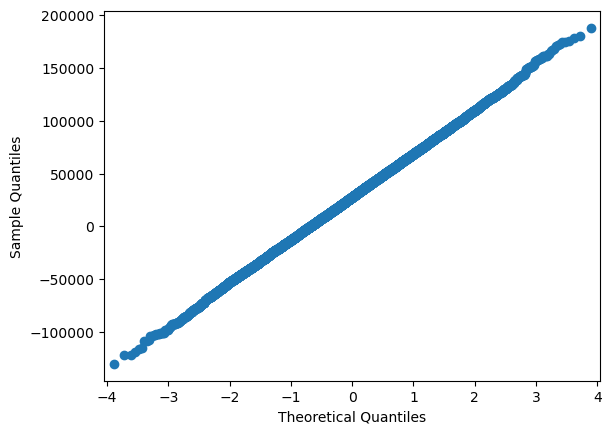

In [14]:
import statsmodels.api as sm

fig = sm.qqplot(normal)

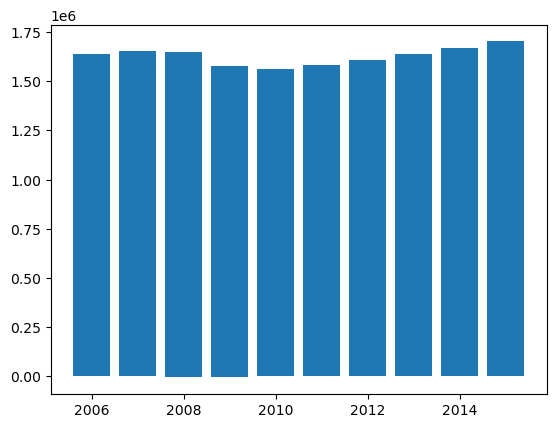

In [15]:
plt.bar(x=grouped_df.year, height=grouped_df.totalfigure) 

plt.show()